In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [23]:
emer = pd.read_csv("911.csv")

In [24]:
emer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [142]:
emer.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,month,dayOfWeek,hour,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,12,Thursday,17,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,12,Thursday,17,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,12,Thursday,17,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,12,Thursday,17,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,12,Thursday,17,2015-12-10


In [26]:
## Top 5 count of 911 calls per zip code

emer['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [27]:
## Top 5 count of 911 calls per Township

emer['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [28]:
emer['title'].nunique()

110

In [29]:
## Updating title column to only contain the three main types of titles
emer.loc[emer['title'].str.contains('EMS'), 'title'] = 'EMS'
emer.loc[emer['title'].str.contains('Fire'), 'title'] = 'Fire'
emer.loc[emer['title'].str.contains('Traffic'), 'title'] = 'Traffic'

In [45]:
## Most common reason for 911 calls based on column data for title
count = emer['title'].value_counts()
count

EMS        48879
Traffic    35695
Fire       14918
Name: title, dtype: int64

In [41]:
title = emer['title'].unique()

Text(0, 0.5, 'Count')

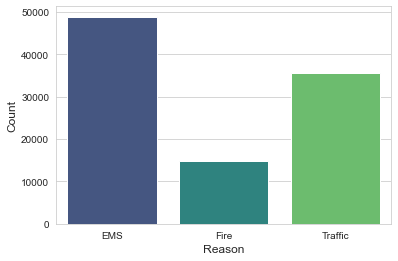

In [54]:
sns.set_style("whitegrid")
p = sns.countplot(x = 'title',
            data = emer, palette = 'viridis',
             )
p.set_xlabel("Reason", fontsize = 12)
p.set_ylabel("Count", fontsize = 12)

In [64]:
emer.dtypes

lat                 float64
lng                 float64
desc                 object
zip                 float64
title                object
timeStamp    datetime64[ns]
twp                  object
addr                 object
e                     int64
dtype: object

In [65]:
## changing timeStamp column to dateTime

emer['timeStamp'] = emer['timeStamp'].astype('datetime64[ns]')

In [68]:
# Creating month, day of week and hour columns from timeStamp column

emer['month'] = pd.DatetimeIndex(emer['timeStamp']).month
emer['dayOfWeek'] = pd.DatetimeIndex(emer['timeStamp']).weekday
emer['hour'] = emer['timeStamp'].dt.hour

In [69]:
## changing the dayOfWeek column from numeric to name of day

days = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
emer['dayOfWeek'] = emer['dayOfWeek'].map(days)


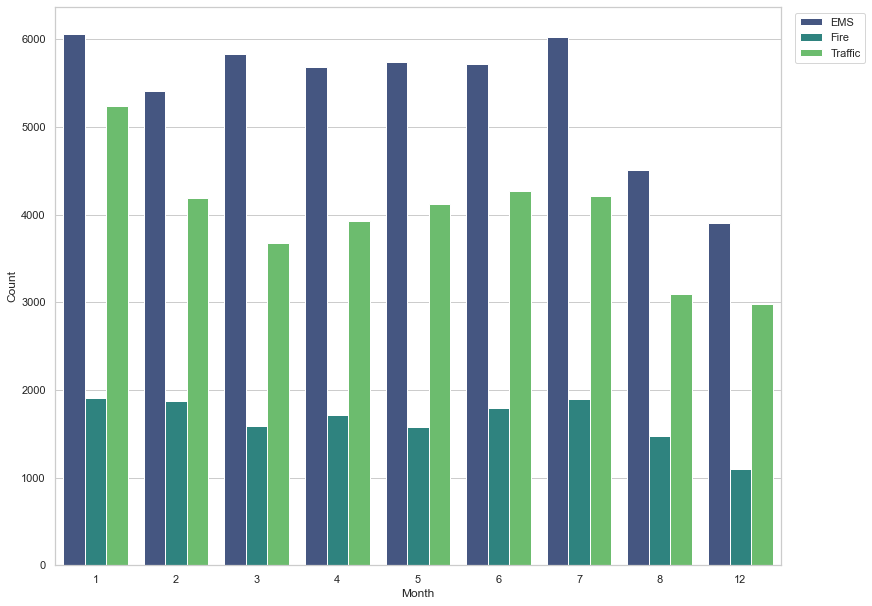

In [105]:
##bar plot showing count of 911 calls per month by type

sns.set_style("whitegrid")
p= sns.countplot(x = 'month', hue ='title',
                 data = emer, 
                 palette = 'viridis',)
p.set_xlabel("Month", fontsize = 12)
p.set_ylabel("Count", fontsize = 12)
legend = p.legend()
legend.set_title("")
plt.legend(loc=(1.02, 0.9))


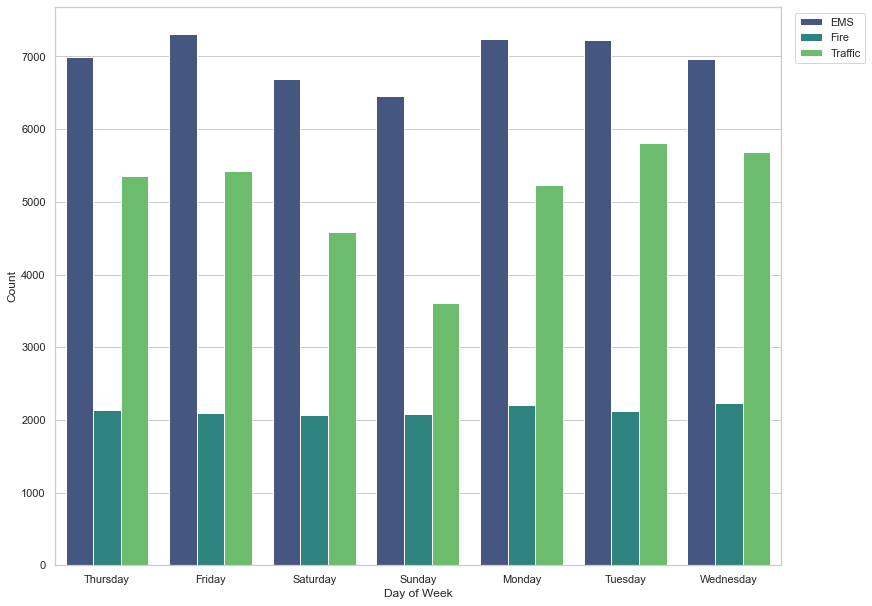

In [107]:
##bar plot showing count of 911 calls per day of week by type

sns.set_style("whitegrid")
p= sns.countplot(x = 'dayOfWeek', hue ='title',
                 data = emer, 
                 palette = 'viridis',)
p.set_xlabel("Day of Week", fontsize = 12)
p.set_ylabel("Count", fontsize = 12)
legend = p.legend()
legend.set_title("")
plt.legend(loc=(1.02, 0.9))
sns.set(rc={'figure.figsize':(13,10.27)})

In [120]:
monthCount = emer.groupby(['month']).count()
monthCount

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,dayOfWeek,hour
month,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969


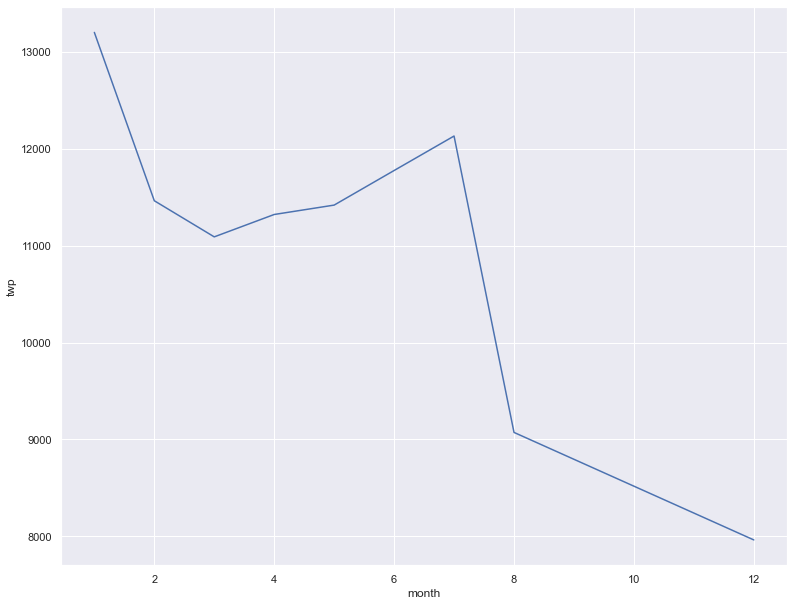

In [116]:
#recreates simple line plot to show all months and 911 calls/month...preceding bar chart did not show all months
p= sns.lineplot(x = 'month',
                     y = 'twp',
           data = monthCount)

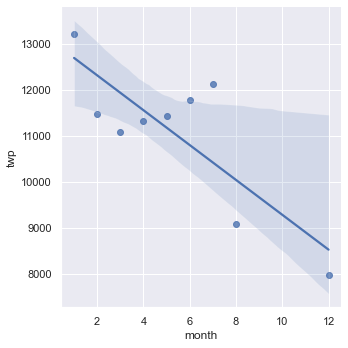

In [125]:
# uses seaborn's lmplot() to create a linear fit on the number of calls per month

p= sns.lmplot(x = 'month',
                     y = 'twp',
           data = monthCount.reset_index())


In [126]:
## creates a date field from timeStamp

emer['date'] = emer['timeStamp'].dt.date

In [128]:
day = emer.groupby(['date']).count()

<AxesSubplot:xlabel='date', ylabel='twp'>

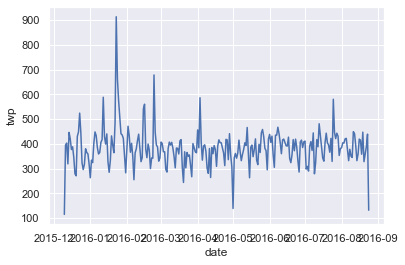

In [129]:
##Showing all medical emergencies by date

sns.plot(x = 'date' hue= emer[''],
                ,
           data = day)

Text(0.5, 1.0, 'Traffic Emergency')

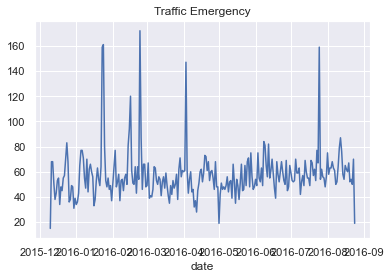

In [134]:
##Showing all traffic emergencies by date

emer[emer['title']=='Fire'].groupby('date').count()['twp'].plot()
plt.title("Traffic Emergency")


Text(0.5, 1.0, 'Emergency Medical Situation')

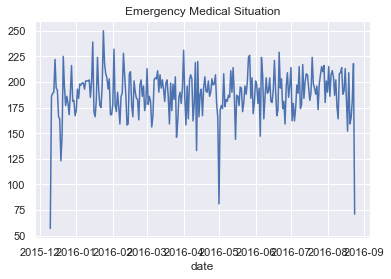

In [135]:
##Showing all EMS by date

emer[emer['title']=='EMS'].groupby('date').count()['twp'].plot()
plt.title("Emergency Medical Situation")

Text(0.5, 1.0, 'Fire Emergency')

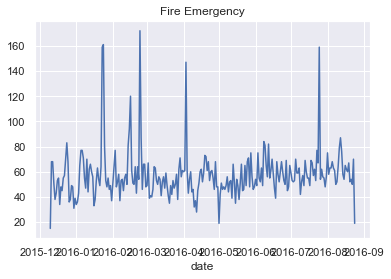

In [136]:
##Showing all fire emergencies by date

emer[emer['title']=='Fire'].groupby('date').count()['twp'].plot()
plt.title("Fire Emergency")

In [139]:
#restructuring the dataframe so that the columns become the Hours and the Index becomes the Day of the Week

dayHour= emer.groupby(by=['dayOfWeek','hour']).count()['title'].unstack()                                                
dayHour.head(10)

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayOfWeek,,,,,,,,,,,,,,,,,,,,,
Friday,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Monday,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Saturday,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sunday,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thursday,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tuesday,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wednesday,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


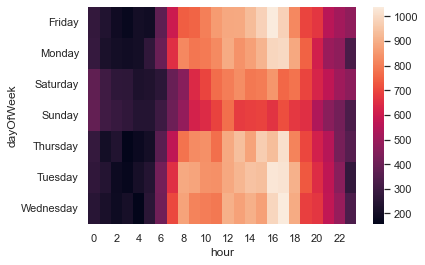

In [140]:

ax = sns.heatmap(dayHour)

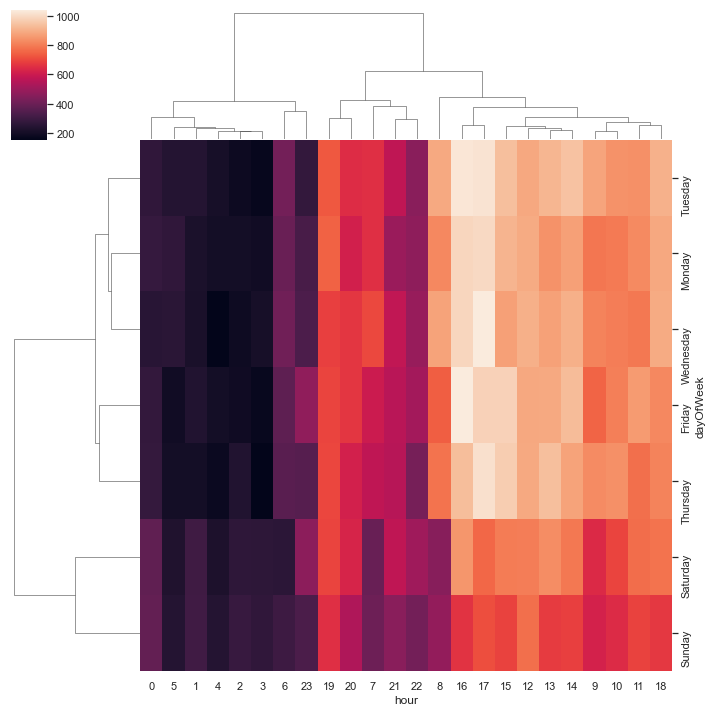

In [141]:
ax = sns.clustermap(dayHour)